In [143]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import scipy.io as sio

import sys
sys.path.append('..')

from helper import kmeans as km

         X1        X2
0  1.842080  4.607572
1  5.658583  4.799964
2  6.352579  3.290854
3  2.904017  4.612204
4  3.231979  4.939894


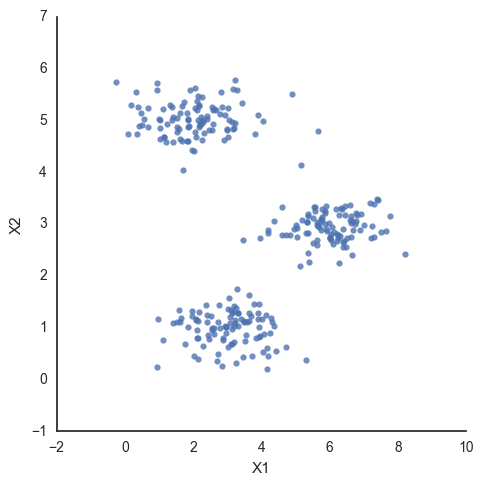

In [144]:
mat = sio.loadmat('./data/ex7data2.mat')
data2 = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
print(data2.head())

sns.set(context="notebook", style="white")
sns.lmplot('X1', 'X2', data=data2, fit_reg=False)

# 0. random init

In [145]:
km.random_init(data2, 3)

array([[ 6.00506534,  2.72784171],
       [ 2.1159935 ,  0.7930365 ],
       [ 2.04974595,  5.6241395 ]])

# 1. cluster assignment
http://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point

### find closest cluster

In [146]:
centroids = km.random_init(data2, 3)
centroids

array([[ 2.05288518,  4.77958559],
       [ 4.88804332,  5.50670795],
       [ 3.00677254,  0.62519128]])

In [147]:
x = np.array([1, 1])

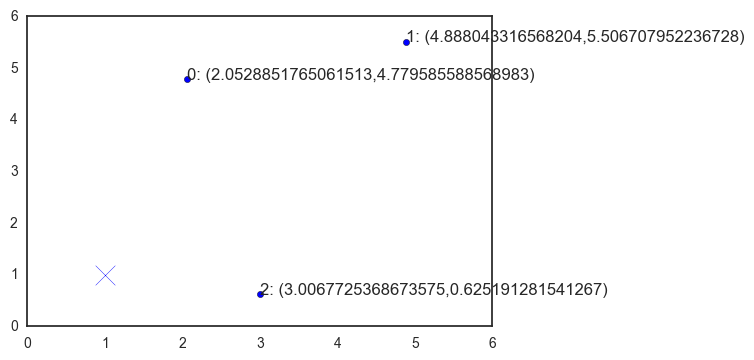

In [148]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x=centroids[:, 0], y=centroids[:, 1])

for i, node in enumerate(centroids):
    ax.annotate('{}: ({},{})'.format(i, node[0], node[1]), node)
    
ax.scatter(x[0], x[1], marker='x', s=200)

In [150]:
km._find_your_cluster(x, centroids)

2

### 1 epoch cluster assigning

In [152]:
C = km.assign_cluster(data2, centroids)
data_with_c = km.combine_data_C(data2, C)
data_with_c.head()

,X1,X2,C
0,1.842080,4.607572,0
1,5.658583,4.799964,1
2,6.352579,3.290854,1
3,2.904017,4.612204,0
4,3.231979,4.939894,0


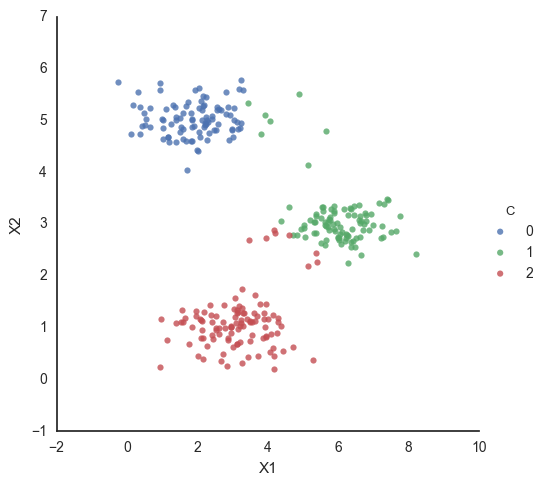

In [153]:
sns.lmplot('X1', 'X2', hue='C', data=data_with_c, fit_reg=False)

# 2. calculate new centroid
so you could update later

In [154]:
km.new_centroids(data2, C)

array([[ 1.8752535 ,  5.02489473],
       [ 6.01718747,  3.11021136],
       [ 3.14217106,  1.10175389]])

# putting all together

In [156]:
C = km.k_means(data2, 3)

In [157]:
data_with_c = km.combine_data_C(data2, C)
data_with_c.head()

,X1,X2,C
0,1.842080,4.607572,2
1,5.658583,4.799964,1
2,6.352579,3.290854,1
3,2.904017,4.612204,2
4,3.231979,4.939894,2


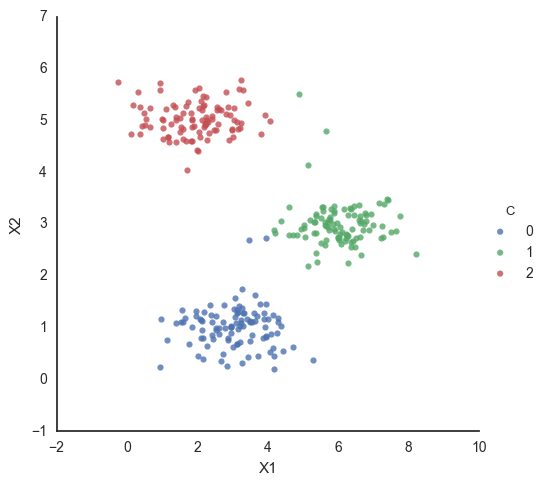

In [158]:
sns.lmplot('X1', 'X2', hue='C', data=data_with_c, fit_reg=False)

# calculate the cost

In [166]:
data2.as_matrix().shape

(300, 2)